# Projeto disciplina IA367


## Classificador de cenários em sistemas de distribuição 
## Integrantes: 


*  Hernán Ullón         
*  Karen Rosero
*  Luis Henrique Tenório







## 1. Bibliotecas

In [1]:
import keras
keras.backend.set_image_data_format('channels_last')
from keras.models import Sequential
from keras.layers import *
from keras.models import Model
from keras.utils.vis_utils import plot_model
import os 
import numpy as np
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import load_model

# 2. Classificação de curvas de carga reais

## 2.1. Importo os dados reais dos transformadores

In [2]:
_dir = "/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/banco de dados v5/"

transf_ok = ["medidores_0.csv","medidores_1.csv","medidores_2.csv","medidores_3.csv", "medidores_4.csv", "medidores_5.csv"]

#Transformador 0
data_0 = genfromtxt(os.path.join(_dir, transf_ok[0]), delimiter=',')
data_0 = data_0[1:,1:]     
y_0 = np.zeros((data_0.shape[0]))
print(y_0.shape)

#Transformador 1
data_1 = genfromtxt(os.path.join(_dir, transf_ok[1]), delimiter=',')
data_1 = data_1[1:,1:] 
y_1 = np.ones((data_1.shape[0]))   

#Transformador 2
data_2 = genfromtxt(os.path.join(_dir, transf_ok[2]), delimiter=',')
data_2 = data_2[1:,1:] 
y_2 = np.ones((data_2.shape[0]))*2

#Transformador 3
data_3 = genfromtxt(os.path.join(_dir, transf_ok[3]), delimiter=',')
data_3 = data_3[1:,1:] 
y_3 = np.ones((data_3.shape[0]))*3

#Transformador 4
data_4 = genfromtxt(os.path.join(_dir, transf_ok[4]), delimiter=',')
data_4 = data_4[1:,1:] 
y_4 = np.ones((data_4.shape[0]))*4 

#Transformador 5
data_5 = genfromtxt(os.path.join(_dir, transf_ok[5]), delimiter=',')
data_5 = data_5[1:,1:]   
y_5 = np.ones((data_5.shape[0]))*5

(9737,)


In [3]:
# Concateno verticalmente todas as amostras dos transformadores
features = np.vstack((data_0, data_1, data_2, data_3, data_4, data_5))
features = np.expand_dims(features, axis = 2)
print("Número total de amostras", features.shape)
# concateno verticalmente todas al labels 
labels = np.concatenate((y_0, y_1, y_2, y_3, y_4, y_5))
print("Número total de labels", labels.shape)
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(labels))
# apago as variaveis desnecessarias
#del data_0, data_1, data_2, data_4, data_5

Número total de amostras (33519, 96, 1)
Número total de labels (33519,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26815, 96, 1) (6704, 96, 1) (26815, 6) (6704, 6)


## 2.2. Crio o modelo classificador

In [5]:
from keras.models import Sequential
def Model_CNN_1D(input_data):
  modelCNN1D = Sequential()
  input_shape=(input_data.shape[1], input_data.shape[2])

  modelCNN1D.add(Conv1D(60, 4, input_shape=input_shape))
  modelCNN1D.add(Activation('relu'))
  modelCNN1D.add(MaxPooling1D(2))
  modelCNN1D.add(Dropout(rate=0.5))

  modelCNN1D.add(Conv1D(30, 4))
  modelCNN1D.add(Activation('relu'))
  modelCNN1D.add(MaxPooling1D(2))
  modelCNN1D.add(Dropout(rate=0.5))

  modelCNN1D.add(Flatten())
  modelCNN1D.add(Dropout(rate=0.5))
  modelCNN1D.add(Dense(256))
  modelCNN1D.add(Activation('relu'))
  modelCNN1D.add(Dropout(rate=0.5))

  modelCNN1D.add(Dense(6))
  modelCNN1D.add(Activation('softmax'))
  return modelCNN1D

In [6]:
modelCNN1D = Model_CNN_1D(X_train)

In [7]:
modelCNN1D.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 93, 60)            300       
                                                                 
 activation (Activation)     (None, 93, 60)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 46, 60)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 60)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 30)            7230      
                                                                 
 activation_1 (Activation)   (None, 43, 30)            0         
                                                        

## 2.3. Treinamento do modelo

In [8]:
# Training model

modelCNN1D.compile(
  optimizer="Adam",
  loss="categorical_crossentropy",
  metrics=['accuracy'])

checkpoint_filepath = "/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/trained models/CNNv2.h5"

model_checkp = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

history = modelCNN1D.fit(
  x=X_train, 
  y=y_train,
    epochs=200,
    batch_size=356, validation_data = (X_test, y_test), callbacks=[model_checkp, early_stop_callback])

Epoch 1/200
76/76 [==============================] - 13s 16ms/step - loss: 0.9764 - accuracy: 0.5844 - val_loss: 0.6135 - val_accuracy: 0.7539
Epoch 2/200
76/76 [==============================] - 1s 7ms/step - loss: 0.6462 - accuracy: 0.7042 - val_loss: 0.5105 - val_accuracy: 0.7704
Epoch 3/200
76/76 [==============================] - 0s 6ms/step - loss: 0.5697 - accuracy: 0.7330 - val_loss: 0.4902 - val_accuracy: 0.7667
Epoch 4/200
76/76 [==============================] - 1s 7ms/step - loss: 0.5401 - accuracy: 0.7492 - val_loss: 0.4737 - val_accuracy: 0.7773
Epoch 5/200
76/76 [==============================] - 0s 6ms/step - loss: 0.5206 - accuracy: 0.7574 - val_loss: 0.4642 - val_accuracy: 0.7737
Epoch 6/200
76/76 [==============================] - 1s 7ms/step - loss: 0.5079 - accuracy: 0.7623 - val_loss: 0.4457 - val_accuracy: 0.7877
Epoch 7/200
76/76 [==============================] - 1s 8ms/step - loss: 0.4970 - accuracy: 0.7660 - val_loss: 0.4438 - val_accuracy: 0.7821
Epoch 8/200

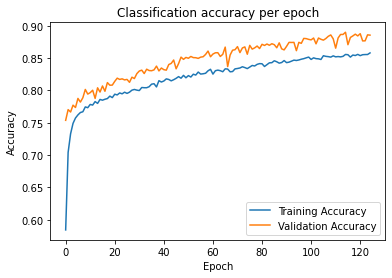

In [9]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
np.save("/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/history curves/CNNv2_history.npy", np.concatenate((train_accuracy,val_accuracy), axis = 0))
# Set figure size.
plt.figure()
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
# Set title
plt.title('Classification accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
model = load_model('/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/trained models/CNNv2.h5')

score = model.evaluate(
  x=X_test,
  y=y_test)

print('Test loss:', score[0])
print('Accuracy:', score[1])

210/210 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.8901
Test loss: 0.2658490538597107
Accuracy: 0.890065610408783


# 3. Classificação das amostras criadas sintéticamente

## 3.1. Importo os dados gerados

In [15]:
_dir = "/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/new_transf6.csv"

#Amostras aleatorias de todos os transformadores
data_0 = genfromtxt(_dir, delimiter=',')  
print(data_0.shape)


(9385, 96)


## 3.2. Carrego o modelo treinado em dados reais

In [16]:
model = load_model("/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/trained models/CNNv2.h5")

In [17]:
predict =  np.argmax(model.predict(data_0), axis = -1)
print(predict.shape, predict[0:10]) 

(9385,) [0 1 0 0 2 0 2 0 0 0]


In [18]:
print("O número de amostras de cada tipo foram:")
print("Medidor 0: ", np.count_nonzero(predict == 0))
print("Medidor 1: ", np.count_nonzero(predict == 1))
print("Medidor 2: ", np.count_nonzero(predict == 2))
print("Medidor 3: ", np.count_nonzero(predict == 3))
print("Medidor 4: ", np.count_nonzero(predict == 4))
print("Medidor 5: ", np.count_nonzero(predict == 5))

O número de amostras de cada tipo foram:
Medidor 0:  3886
Medidor 1:  2469
Medidor 2:  2476
Medidor 3:  318
Medidor 4:  220
Medidor 5:  16


Foram geradas mais amostras correspondentes com os medidores que tiveram maior número de amostras reais durante o treinamento do modelo.


# 4. Classificação incluindo as amostras geradas sinteticamente

## 4.1. Importo os dados gerados sinteticamente

In [26]:
_dir = "/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final"

transf_ok = ["new_transf0_40p.csv","new_transf1_40p.csv","new_transf2_40p.csv","new_transf3_40p.csv","new_transf4_40p.csv","new_transf5_40p.csv"]

#Transformador 0
dataS_0 = genfromtxt(os.path.join(_dir, transf_ok[0]), delimiter=',')  
yS_0 = np.zeros((dataS_0.shape[0]))
print(yS_0.shape)

#Transformador 1
dataS_1 = genfromtxt(os.path.join(_dir, transf_ok[1]), delimiter=',')
yS_1 = np.ones((dataS_1.shape[0]))   

#Transformador 2
dataS_2 = genfromtxt(os.path.join(_dir, transf_ok[2]), delimiter=',')
yS_2 = np.ones((dataS_2.shape[0]))*2

#Transformador 3
dataS_3 = genfromtxt(os.path.join(_dir, transf_ok[3]), delimiter=',')
yS_3 = np.ones((dataS_3.shape[0]))*3

#Transformador 4
dataS_4 = genfromtxt(os.path.join(_dir, transf_ok[4]), delimiter=',')
yS_4 = np.ones((dataS_4.shape[0]))*4 

#Transformador 5
dataS_5 = genfromtxt(os.path.join(_dir, transf_ok[5]), delimiter=',')
yS_5 = np.ones((dataS_5.shape[0]))*5

(3116,)


In [27]:
# Concateno verticalmente todas as amostras dos transformadores
features_S = np.vstack((dataS_0, dataS_1, dataS_2, dataS_3, dataS_4, dataS_5))
features_S = np.expand_dims(features_S, axis = 2)
print("Número total de amostras sintéticas ", features_S.shape)
# concateno verticalmente todas al labels 
labels_S = np.concatenate((yS_0, yS_1, yS_2, yS_3, yS_4, yS_5))
print("Número total de labels sintéticas", labels_S.shape)
lb = LabelEncoder()
yS = to_categorical(lb.fit_transform(labels_S))
# apago as variaveis desnecessarias
#del data_0, data_1, data_2, data_4, data_5

Número total de amostras sintéticas  (10724, 96, 1)
Número total de labels sintéticas (10724,)


In [28]:
features_all = np.concatenate((features_S, X_train), axis=0)
print(features_all.shape)
labels_all = np.concatenate((yS, y_train), axis=0)
print(labels_all.shape)

(37539, 96, 1)
(37539, 6)


## 4.2. Treinamento do modelo

In [29]:
model_Aug = Model_CNN_1D(features_all)

In [30]:
# Training model

model_Aug.compile(
  optimizer="Adam",
  loss="categorical_crossentropy",
  metrics=['accuracy'])

checkpoint_filepath = "/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/trained models/CNN_augv2.h5"

model_checkp = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30)

history2 = model_Aug.fit(
  x=features_all, 
  y=labels_all,
    epochs=300,
    batch_size=100, validation_data = (X_test, y_test), callbacks=[model_checkp, early_stop_callback])

Epoch 1/300
376/376 [==============================] - 2s 5ms/step - loss: 0.6814 - accuracy: 0.6943 - val_loss: 0.4848 - val_accuracy: 0.7728
Epoch 2/300
376/376 [==============================] - 2s 4ms/step - loss: 0.4979 - accuracy: 0.7691 - val_loss: 0.4557 - val_accuracy: 0.7889
Epoch 3/300
376/376 [==============================] - 2s 4ms/step - loss: 0.4664 - accuracy: 0.7840 - val_loss: 0.4301 - val_accuracy: 0.7937
Epoch 4/300
376/376 [==============================] - 2s 4ms/step - loss: 0.4486 - accuracy: 0.7922 - val_loss: 0.4202 - val_accuracy: 0.8062
Epoch 5/300
376/376 [==============================] - 2s 4ms/step - loss: 0.4357 - accuracy: 0.7993 - val_loss: 0.4107 - val_accuracy: 0.8052
Epoch 6/300
376/376 [==============================] - 2s 4ms/step - loss: 0.4240 - accuracy: 0.8059 - val_loss: 0.4001 - val_accuracy: 0.8189
Epoch 7/300
376/376 [==============================] - 2s 4ms/step - loss: 0.4153 - accuracy: 0.8061 - val_loss: 0.3970 - val_accuracy: 0.8138

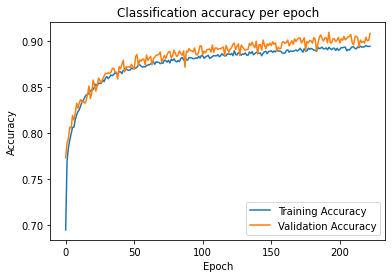

In [31]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
np.save("/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/history curves/CNN_Augv2_history.npy", np.concatenate((train_accuracy,val_accuracy), axis = 0))
# Set figure size.
plt.figure()
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
# Set title
plt.title('Classification accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/history curves/class_learn_curvev2.png", dpi=300)

In [32]:
model_aug = load_model("/content/drive/MyDrive/Especial/IA376/Syntetic_Load_Curves/new_samples_final/trained models/CNN_augv2.h5")

score = model_aug.evaluate(
  x=X_test,
  y=y_test)

print('Test loss:', score[0])
print('Accuracy:', score[1])

210/210 [==============================] - 1s 3ms/step - loss: 0.2239 - accuracy: 0.9095
Test loss: 0.2239488810300827
Accuracy: 0.9094570279121399
